In [1]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [2]:
mnist_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
urllib.request.urlretrieve(mnist_url, "mnist.npz")

# Load the npz file
data = np.load("mnist.npz")

In [3]:
# Display the keys in the file
print("Keys in the file:", data.files)

Keys in the file: ['x_test', 'x_train', 'y_train', 'y_test']


In [4]:
train_images = data['x_train']
train_labels = data['y_train']

num_labels = len(np.unique(train_labels))
num_train_images = len(train_images)
print("Number of unique labels:", num_labels)
print("Size of training set:", num_train_images)


Number of unique labels: 10
Size of training set: 60000


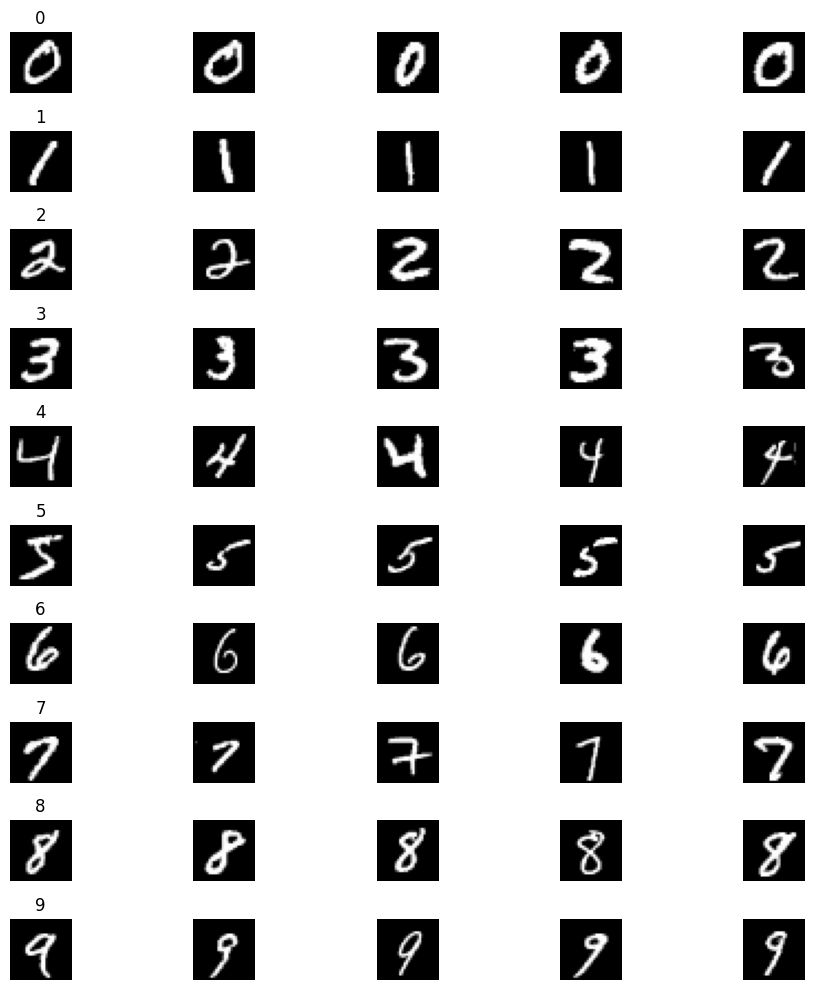

In [5]:
# Initialize a dictionary to store 5 samples from each class
samples_per_class = {label: [] for label in range(num_labels)}

# Collect 5 samples from each class
for i, label in enumerate(train_labels):
    if len(samples_per_class[label]) < 5:
        samples_per_class[label].append(train_images[i])

plt.figure(figsize=(10, 10))  # Increase the overall figure size

for label, samples in samples_per_class.items():
    for i, sample in enumerate(samples):
        plt.subplot(10, 5, label * 5 + i + 1)
        plt.imshow(sample, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(label))
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks

plt.tight_layout()
plt.show()


In [6]:
train_images = train_images.reshape(train_images.shape[0], -1)
num_features = train_images.shape[1]
print("Number of pixels in each image:", num_features)

Number of pixels in each image: 784


In [7]:
print(train_images.shape)
class_means = []
class_inv_covs = []
for i in range(num_labels):
    mask = (train_labels == i)
    selected_rows = train_images[mask]
    mean = np.mean(selected_rows, axis=0)
    cov = np.cov(selected_rows, rowvar=False)
    class_means.append(mean)
    inv_cov = np.linalg.pinv(cov)
    class_inv_covs.append(inv_cov)

class_means = np.array(class_means)
class_inv_covs = np.array(class_inv_covs)

(60000, 784)


In [8]:
priori_list = [0]*10
for i in range(num_train_images):
    priori_list[train_labels[i]] += 1
priori_list = np.array(priori_list)
priori_list = priori_list/num_train_images
priori_list

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [9]:
def QDA(x, mean, inv, priori):
    ans = - 0.5 * ((x @ inv @ (x.T)) - 2 * (mean @ inv @ (x.T)) + (mean @ inv @ (mean.T))) + np.log(priori)
    return ans

In [10]:
def max_QDA(x):
    max_label = 0
    maximum_QDA = QDA(x, class_means[0], class_inv_covs[0], priori_list[0])
    for i in range(1, num_labels):
        class_QDA = QDA(x, class_means[i], class_inv_covs[i], priori_list[i])
        if class_QDA > maximum_QDA:
            max_label = i
            maximum_QDA = class_QDA
    return max_label

In [11]:
test_images = data['x_test']
test_labels = data['y_test']

In [12]:
test_images = test_images.reshape(test_images.shape[0], -1)
num_tests = len(test_images)
test_images.shape

(10000, 784)

In [13]:
samples_per_label = [0]*10
classifications_per_label = [0]*10
correct_classification = 0
for i in range(len(test_images)):
    classfied_label = max_QDA(test_images[i])
    correct_label = test_labels[i]
    if classfied_label == correct_label:
        correct_classification += 1
        classifications_per_label[correct_label] += 1
    samples_per_label[correct_label] += 1
    print("correct classifications:", correct_classification, " total samples tested:", i+1)

accuracy = (correct_classification / num_tests) * 100
print("Accuracy: {:.2f}%".format(accuracy))

correct classifications: 1  total samples tested: 1
correct classifications: 2  total samples tested: 2
correct classifications: 3  total samples tested: 3
correct classifications: 4  total samples tested: 4
correct classifications: 5  total samples tested: 5
correct classifications: 6  total samples tested: 6
correct classifications: 7  total samples tested: 7
correct classifications: 8  total samples tested: 8
correct classifications: 9  total samples tested: 9
correct classifications: 10  total samples tested: 10
correct classifications: 11  total samples tested: 11
correct classifications: 12  total samples tested: 12
correct classifications: 13  total samples tested: 13
correct classifications: 14  total samples tested: 14
correct classifications: 15  total samples tested: 15
correct classifications: 15  total samples tested: 16
correct classifications: 16  total samples tested: 17
correct classifications: 17  total samples tested: 18
correct classifications: 17  total samples tes

In [14]:
for i in range(num_labels):
    label_accuracy = (classifications_per_label[i]/samples_per_label[i])*100
    print("Label {:01d}:".format(i), "{:.2f}%".format(label_accuracy))

Label 0: 93.47%
Label 1: 67.40%
Label 2: 93.60%
Label 3: 87.52%
Label 4: 90.94%
Label 5: 79.93%
Label 6: 89.04%
Label 7: 86.38%
Label 8: 88.81%
Label 9: 82.16%
